In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.simplefilter('ignore')

# Практика: Погружение в глубокое обучение
В семинаре, будем использовать набор данных `fashion_mnist`, загрузим их

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train_cat), (x_test, y_test_cat) = fashion_mnist.load_data()
print('Training data shape: ', x_train.shape)
print('Test data shape: ', x_test.shape)

num_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
               'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Using TensorFlow backend.


Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


Сгенерируем случаные примеры для каждого класса и посмотрим на них.

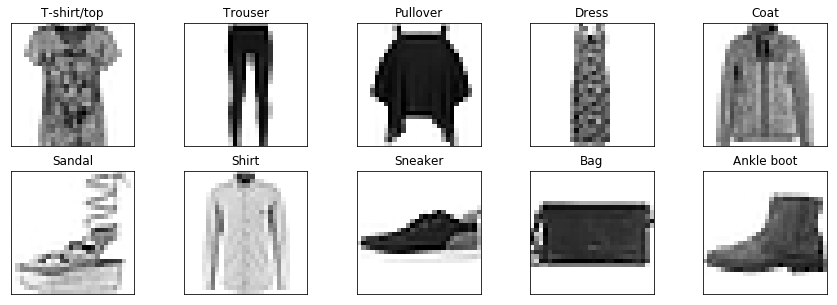

In [3]:
fig = plt.figure(figsize=(15,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train_cat[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im, cmap='gray_r')
plt.show()

##  Построим нашу первую нейросеть
Импорт `Keras`

In [4]:
from keras.models import Sequential # Модель, где все слои соединены друг с другом
from keras.layers import Dense, Flatten, Activation # Слой, где все нйероны предыдущего уровня соединены с нейронами следующего
from keras.utils import np_utils
from keras.optimizers import SGD,Adam,RMSprop

### Проведем небольшие предобработки

In [5]:
y_train = np_utils.to_categorical(y_train_cat, num_classes=num_classes)
y_test = np_utils.to_categorical(y_test_cat, num_classes=num_classes)

### Построим модель

In [7]:
input_shape = x_train.shape[1:]

In [8]:
input_shape

(28, 28)

In [14]:
# Создаем последовательную модель
model = Sequential()

# Добавляем слои
model.add(Flatten(input_shape=input_shape))
model.add(Dense(20))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Компилируем модель
optimizer = SGD(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total para

#### Вопрос: 
Почему: $784 \times 20 = 156 80$, а сетка показывает число параметров: $15700$?

### Обучим модель, задав параметры

In [16]:
batch_size = 1000 # Выбираем размер Батча
epochs = 100

In [17]:
# Обучаем модель! 
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/step - loss: 2.2408 - acc: 0.2518 - val_loss: 2.1485 - val_acc: 0.4041
Epoch 2/100
60000/60000 [==============================] - 1s 9us/step - loss: 2.0662 - acc: 0.5301 - val_loss: 1.9835 - val_acc: 0.5718
Epoch 3/100
60000/60000 [==============================] - 1s 9us/step - loss: 1.8925 - acc: 0.5899 - val_loss: 1.8060 - val_acc: 0.6063
Epoch 4/100
60000/60000 [==============================] - 0s 7us/step - loss: 1.7190 - acc: 0.6179 - val_loss: 1.6352 - val_acc: 0.6308
Epoch 5/100
60000/60000 [==============================] - 0s 7us/step - loss: 1.5639 - acc: 0.6439 - val_loss: 1.5026 - val_acc: 0.6357
Epoch 6/100
60000/60000 [==============================] - 0s 7us/step - loss: 1.4355 - acc: 0.6608 - val_loss: 1.3841 - val_acc: 0.6609
Epoch 7/100
60000/60000 [==============================] - 0s 8us/step - loss: 1.3232 - acc: 0.6735 - val_loss: 1.2777 - val_ac

60000/60000 [==============================] - 0s 7us/step - loss: 0.6227 - acc: 0.7729 - val_loss: 0.6353 - val_acc: 0.7733
Epoch 61/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.6205 - acc: 0.7789 - val_loss: 0.6468 - val_acc: 0.7652
Epoch 62/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.6212 - acc: 0.7762 - val_loss: 0.6417 - val_acc: 0.7677
Epoch 63/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.6167 - acc: 0.7802 - val_loss: 0.6453 - val_acc: 0.7648
Epoch 64/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.6088 - acc: 0.7770 - val_loss: 0.6296 - val_acc: 0.7703
Epoch 65/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.6115 - acc: 0.7792 - val_loss: 0.6320 - val_acc: 0.7838
Epoch 66/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.6391 - acc: 0.7730 - val_loss: 0.6633 - val_acc: 0.7619
Epoch 67/100
60000/60000 [=====================

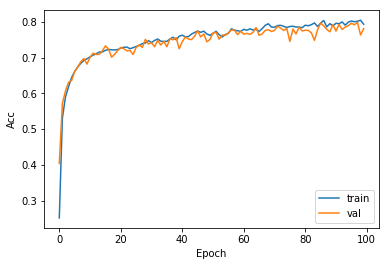

In [18]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

Измените сеть выше, добавив еще один скрытый слой `Dense()` с 10 нейронами и перезапустите обучение

## Что мы можем улучшить? 
- Отнормировать признаки
- Заменить сигмоиды на ReLu
- Задать правила инициации весов

### Нормирование
<img src='normalize.png'>

Нормализуйте данные:

In [20]:
# Ваш код здесь
x_train = (x_train/255)*2-1
x_test = (x_test/255)*2-1

### Функции активации
<img src='activations.png'>

### Инициациия весов
__Случайно__  
$ w = a * random$, но тогда если $a \gg 1$, то на выходе $b\gg1$ и если $a \ll 1 $, то $b \approx 0 $  

__Xavier__  
$a = \frac{1}{\sqrt{n}}$, где $n$ - кол-во нейронов на входе

__He__  
$a = \frac{1}{\sqrt{\frac{n}{2}}}$, где $n$ - кол-во нейронов на входе

In [23]:
from keras.initializers import he_normal

Напишите функцию `create_model()` создания и компиляции нейронной сети со следующей архитектурой:
- Полносвязный слой с 20 нейронами
- Полносвязный слой с 10 нейронами
- Полносвязный слой с 10 нейронами
Для компиляции используйте категориальный лосс и метрику `accuracy`. `optimizer` должен задаваться в параметре. 
Добавьте к каждому `Dense` слою функцию инициации весов `he_normal` и функцию активации `ReLU`: 

In [24]:
def create_model(input_shape, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(20, kernel_initializer=he_normal()))
    model.add(Activation('relu'))
    model.add(Dense(10, kernel_initializer=he_normal()))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
optimizer = SGD(lr=0.1)
model = create_model(input_shape, optimizer)

In [26]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/step - loss: 1.2407 - acc: 0.5672 - val_loss: 0.7991 - val_acc: 0.7015
Epoch 2/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.7216 - acc: 0.7367 - val_loss: 0.6501 - val_acc: 0.7622
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.6117 - acc: 0.7769 - val_loss: 0.6266 - val_acc: 0.7712
Epoch 4/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.5712 - acc: 0.7914 - val_loss: 0.5944 - val_acc: 0.7842
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5376 - acc: 0.8032 - val_loss: 0.5224 - val_acc: 0.8138
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.5164 - acc: 0.8127 - val_loss: 0.5356 - val_acc: 0.8042
Epoch 7/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4942 - acc: 0.8209 - val_loss: 0.5194 - 

Epoch 60/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3331 - acc: 0.8772 - val_loss: 0.3913 - val_acc: 0.8625
Epoch 61/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3243 - acc: 0.8823 - val_loss: 0.3943 - val_acc: 0.8593
Epoch 62/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3173 - acc: 0.8855 - val_loss: 0.3961 - val_acc: 0.8614
Epoch 63/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3240 - acc: 0.8823 - val_loss: 0.4316 - val_acc: 0.8489
Epoch 64/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3210 - acc: 0.8839 - val_loss: 0.4140 - val_acc: 0.8535
Epoch 65/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.3222 - acc: 0.8830 - val_loss: 0.3902 - val_acc: 0.8654
Epoch 66/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3198 - acc: 0.8824 - val_loss: 0.3900 - val_acc: 0.8618
Epoch 67/100
60000/60000 [======

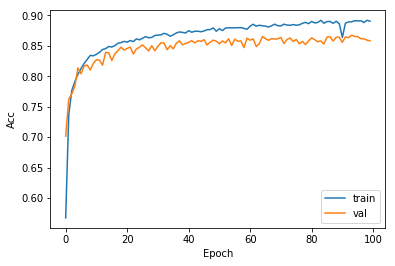

In [27]:
def viz_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

viz_history(history)

## Влияние скорости обучения
Посмотрим, как влияет параметр `learning_rate` на качество нашей модели на обучающей выборке.  
Задайте `learning_rate` значениями `[0.001, 0.01, 0.1, 1]` и постройте графики acc для каждого значения:

100%|██████████| 4/4 [03:38<00:00, 55.08s/it]


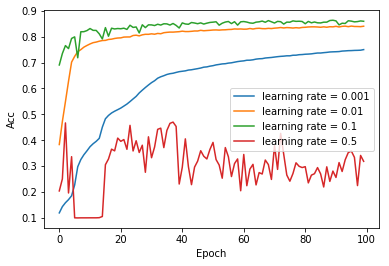

In [28]:
for i in tqdm([0.001, 0.01, 0.1, 0.5]):
    optimizer = SGD(lr=i)
    model = create_model(input_shape, optimizer)
    history = model.fit(x_train, y_train, verbose=0,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
    plt.plot(history.history['val_acc'], label='learning rate = {}'.format(i))
    

    
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Влияние метода оптимизации градиентного спуска

<img src='optimizers7.gif'>

#### Momentum
Вместо того, чтобы использовать только градиент текущего шага, мы будем накапливать импульс градиента прошлых шагов для определения направления движения. 
В связи со стохастической природой, обновления градиента происходят "зигзагообразно", с помощью момента мы усиливаем движение вдоль основного направления. На практике коэффициент у момента инициализируется на уровне 0,5 и постепенно увеличивается до 0,9 в течение нескольких эпох. 
  
#### RMSProp (Root Mean Square Propogation)   
Мы обновляяем меньше веса, которые слишком часто обновляются, и будем использовать усреднённый по истории квадрат градиента.

#### Adam (Adaptive moment estimation)
Cочетает в себе и идею накопления движения и идею более слабого обновления весов для типичных признаков

Постройте графики зависимости качества обучения на валидационной выборе для разных оптимизаторов:
    - SGD with Momentum
    - Adam
    - RMSprop

In [ ]:
# Ваш код здесь

plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Применим, все полученные знания

Задайте в качестве оптимизатора `Adam()` и обучите модель: 

In [ ]:
# Ваш код здесь

In [ ]:
viz_history(history)

## Объявляем, борьбу с переобучением

In [ ]:
from keras.layers import Dropout, BatchNormalization

Добавьте  после каждого `Dense` слоя в нашу сеть `Dropout` или `BatchNormalization`:

In [ ]:
# Ваш код здесь

In [ ]:
viz_history(history)

# Ссылки
- [Курс "Deep learning на пальцах", лекция 4](https://youtu.be/tnrbx7V9RbA)
- [Статья: Оптимизация градиентного спуска](http://ruder.io/optimizing-gradient-descent/)
- [Статья: Методы оптимизации нейронных сетей](https://habr.com/ru/post/318970/)